<a href="https://colab.research.google.com/github/joaovitor-lemes/Projetos/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries Temporais

Séries temporais são um tipo de dado organizado em ordem cronológica, utilizado para analisar, prever ou entender fenômenos que evoluem ao longo do tempo. Esses dados são compostos por observações registradas em intervalos regulares, como dias, semanas, meses ou anos.

É uma sequência de valores de uma variável, ordenados pelo tempo. Por exemplo:



*   O preço diário de uma ação na bolsa.
*   A temperatura média semanal de uma cidade.
*   As vendas mensais de uma empresa.

O foco principal ao trabalhar com séries temporais é entender padrões e dependências temporais, como tendências, sazonalidade ou ciclos.

<center><img alt="Analisando Airbnb" width="30%" src="https://img.freepik.com/vetores-gratis/ilustracao-do-conceito-de-analise-de-crescimento_114360-2287.jpg?t=st=1738086639~exp=1738090239~hmac=7c4a0c1e5176730f48d940bdd0c529738c162c3313f543288b399ef023a5776b&w=740"></center>

## Métodos para análise de séries temporais


1. **Modelos Estatísticos**

* *ARIMA (Autoregressive Integrated Moving Average)*: Modelo clássico para séries estacionárias.

* *SARIMA (Seasonal ARIMA)*: Uma extensão que inclui sazonalidade.


2. **Métodos de Alisamento**

* Média Móvel: Suaviza flutuações curtas para destacar tendências.

* Suavização Exponencial: Dá mais peso a valores recentes.
Aprendizado de Máquina e Deep Learning


3. **Modelos supervisionados:**
* Redes neurais (LSTM, GRU), Random Forests.
* Redes Neurais Recorrentes (RNNs): Para dados sequenciais com dependências temporais.



4. **Decomposição de Série Temporal**

* Separar a série em tendência, sazonalidade e resíduo para entender melhor cada componente.




## Análise dos Dados

Os dados que serão analisados são referentes ao consumo de energia em um determinado período de tempo.

In [77]:
# Importando as Bibliotecas que iremos usar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

sns.set_style()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
# Lendo o arquivo csv

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv")
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
# A coluna de Data deve estar no formato datetime, o comando dtype é pra avaliar isso

df.dtypes

# Percebe-se que a Coluna Date está no formato object, logo termos que mudála para o formato datetime

,0
DATE,object
Value,float64


In [6]:
# Convertendo a Coluna DATE para datetime

pd.to_datetime(df.DATE, format="%m-%d-%Y").head()

,DATE
0,1985-01-01
1,1985-02-01
2,1985-03-01
3,1985-04-01
4,1985-05-01


In [7]:
# convertendo DATE para datetime e associando ao index do dataframe
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# eliminar a coluna DATE
df.drop("DATE", axis=1, inplace=True)

# ver as primeiras 5 entradas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


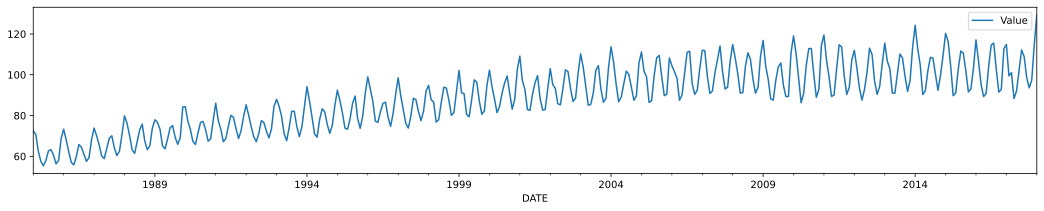

In [25]:
# Plotando o gráfico do consumo de energia mensal

fig, ax = plt.subplots(figsize=(18,3))
df.plot(ax=ax);



## Componentes de uma Série Temporal
* **Tendência (Trend)**

Representa o movimento geral da série ao longo do tempo, como um aumento constante nas vendas de um produto.
Pode ser ascendente, descendente ou até estável.
* **Sazonalidade (Seasonality)**

Padrões que se repetem em intervalos fixos, como aumentos de vendas no Natal ou feriados.
Está associada a fatores como estações do ano, horários ou ciclos econômicos.
* **Ciclos (Cycles)**

Semelhante à sazonalidade, mas com durações irregulares. Geralmente, estão relacionados a fenômenos econômicos ou naturais.
* **Resíduo ou Ruído (Residual/Noise)**

A parte imprevisível da série, que não é explicada pelos outros componentes.
<br>

Vamos plotar os gráficos da Série Temporal em questão e analisar seus componentes.

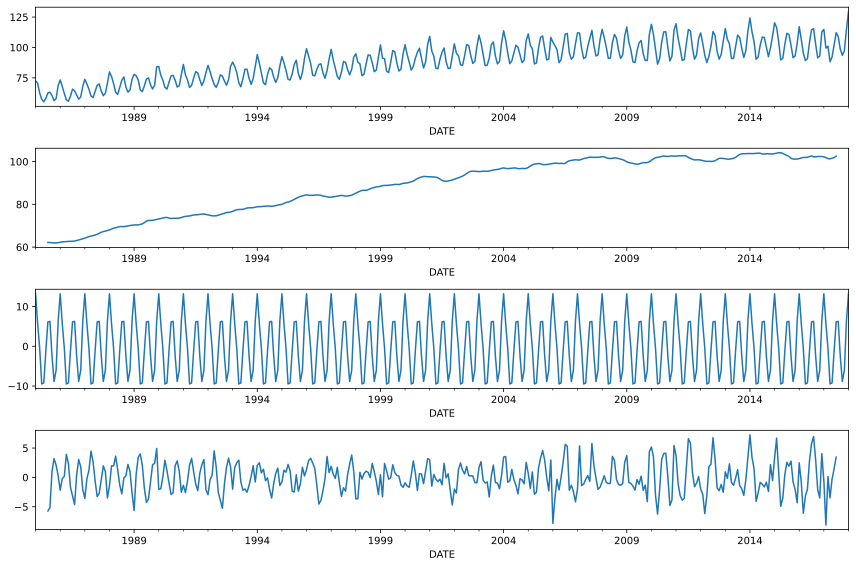

In [26]:
# Plotando os gráficos dos componentes da série temporal

result = seasonal_decompose(df.Value)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(nrows=4,ncols=1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()


Pela análise dos gráficos, percebemos que a tendência da série temporal é de crescimento e que possui uma sazonalidade bem definida.

## Técnicas de *Forecasting* para Séries Temporais

O universo das Séries Temporais (TS) é gigante e complexo. Existem muitos métodos e maneiras de se realizar previsões em cima de bases históricas.

A primeira coisa que ter na mente é que quanto maior o seu horizonte de previsão, maior a incerteza associada a ele. Quanto mais no futuro você tentar ver algo, menor será sua capacidade de inferir algo. Bem-vindo ao mundo real.

Para ajudar nessa tarefa, existem desde técnicas simples (qual será o valor da sua conta de celular no próximo mês) e metodologias altamente complexas e com conceitos estatísticos mais pesados (qual o risco de um tornado atingir aquela cidade).
<br>

Vamos ver alguns modelos a partir de agora...

### 1. *Naive Approach*

No "Modelo Ingênuo", a previsão de $P_{T+1}$ é apenas uma mera observação do período imediatamente anterior ($P_T$). Pense, qual seria o melhor chute para você dizer quanto viria a conta de celular no próximo mês?!

<br>
<center>
<img src="https://miro.medium.com/max/974/1*aVBE9ixa9HEV4Zd3keZE4A.png" width="400px">
</center>

O modelo Naïve pode ser útil em diversas situações, especialmente quando:

✅ A série é altamente aleatória (não há tendência ou sazonalidade clara).<br>
✅ Necessidade de um benchmark: Ele serve como referência para comparar modelos mais sofisticados.<br>
✅ Fácil implementação e baixo custo computacional.<br>
✅ Mercados altamente voláteis, como preços de ações, onde prever mudanças é difícil.



**Vamos implementar a Análise *Naive* nos nossos dados... mas antes, vamos dividir nossos dados em treino e validação para facilitar a visualização e o entendimento para as demais técnicas que se seguirão.**

In [27]:
# dividir entre treino e validação
train = df[df.index <= '2012-8-1']
valid = df[df.index > '2012-8-1']

# criar um dataframe para armazenar as previsões
y_hat = valid.copy()

In [28]:
# Implementando o modelo naive, que no caso, é o último valor da série temporal

y_hat['naive'] = train['Value'].iloc[-1]

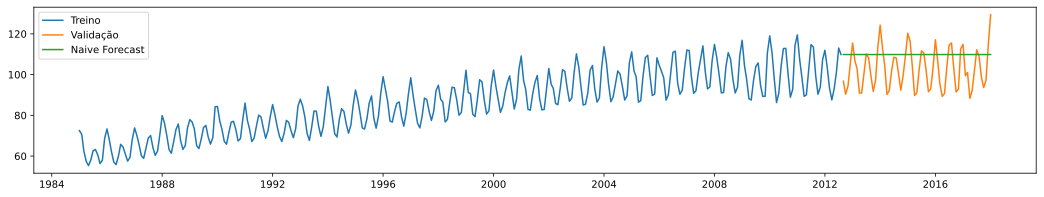

In [31]:
fig, ax = plt.subplots(figsize=(18,3))

ax.plot(train['Value'], label='Treino')
ax.plot(valid['Value'], label='Validação')
ax.plot(y_hat['naive'], label='Naive Forecast')
ax.legend()
plt.show()

In [41]:
# Calcular o erro das previsões
print("MAPE do Método Naive Method:")
display(mean_absolute_percentage_error(y_hat.Value, y_hat.naive))

print("MSE do Método Naive Method:")
display(mean_squared_error(y_hat.Value, y_hat.naive))

MAPE do Método Naive Method:


0.10341412013815658

RMSE do Método Naive Method:


144.18290826476925

### 2. Média Móvel

Se no Método Naive nós consideramos apenas o último valor disponível, as médias móveis permitem utilizarmos uma janela de intervalo.

Médias móveis são excelentes para suavizar curvas (e diminuir a dispersão/ruído) ou mesmo para criar novas variáveis (feature engineering).

Voltando ao exemplo da sua conta de celular, usando médias móveis nós poderíamos usar (por exemplo) as 7 últimas faturas e prever as demais.

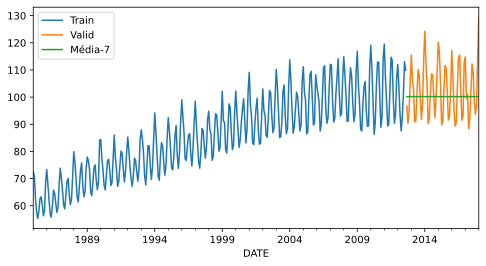

In [42]:
# calcular a média dos últimos 7 valores disponíveis
y_hat['m7'] = train.Value.rolling(7).mean().iloc[-1]

# plotar train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['m7'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Média-7'])
plt.show()

In [47]:
# Calcular o erro das previsões
print("MAPE do Método Média Móvel:")
display(mean_absolute_percentage_error(y_hat.Value, y_hat.m7))

print("MSE do Método Média Móvel:")
mean_squared_error(y_hat.Value, y_hat.m7)

MAPE do Método Média Móvel:


0.07863715824240229

MSE do Método Média Móvel:


101.21254960492308

### 3. Holt´s Linear Trend

Qual o problema das técnicas acima? Elas não permitem que trabalhemos com tendências (apenas o nível das séries).

Já o Holt's Linear Trend Model leva em consideração tanto o nível quanto a tendência, e tende a obter melhores resultados que as técnicas mencionadas anteriormente.

In [48]:
from statsmodels.tsa.holtwinters import Holt

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


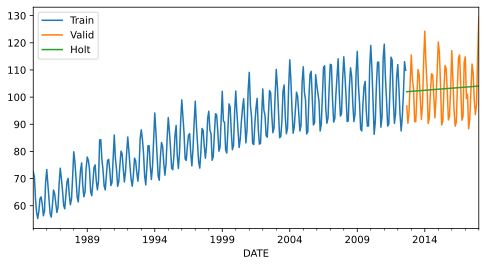

In [68]:
y_hat['holt'] = Holt(train.Value).fit(smoothing_level=0.1, smoothing_trend=0.1).forecast(len(valid))


fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['holt'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Holt'])
plt.show()

In [75]:
# Calcular o erro das previsões
print("MAPE do Método Holt:")
display(mean_absolute_percentage_error(y_hat.Value, y_hat.holt))

print("MSE do Método Holt:")
mean_squared_error(y_hat.Value, y_hat.holt)

MAPE do Método Holt:


0.079576060743054

MSE do Método Holt:


93.79197520557074

### 4. Exponential Smoothing

A Suavização Exponencial é um método amplamente utilizado para análise e previsão de séries temporais. Ele funciona atribuindo pesos aos valores passados, dando maior importância às observações mais recentes. Isso permite capturar padrões nos dados de forma eficiente, sem a necessidade de modelos complexos.

Diferente da média móvel, que trata todas as observações com o mesmo peso, a suavização exponencial reduz gradualmente a influência dos valores mais antigos, tornando-a uma técnica mais sensível às mudanças recentes na série temporal.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


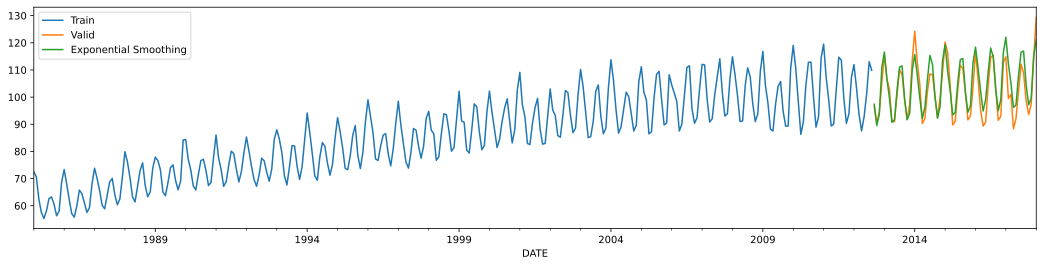

In [80]:
y_hat['ExpSmooth'] = ExponentialSmoothing(train.Value, seasonal_periods=24, trend='add', seasonal='add').fit().forecast(len(valid))

fig, ax = plt.subplots(figsize=(18,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['ExpSmooth'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Exponential Smoothing'])
plt.show()

In [79]:
# Calcular o erro das previsões
print("MAPE do Método Média Móvel:")
display(mean_absolute_percentage_error(y_hat.Value, y_hat.ExpSmooth))

print("MSE do Método Média Móvel:")
mean_squared_error(y_hat.Value, y_hat.ExpSmooth)

MAPE do Método Média Móvel:


0.03594079427053786

MSE do Método Média Móvel:


21.14571720665024

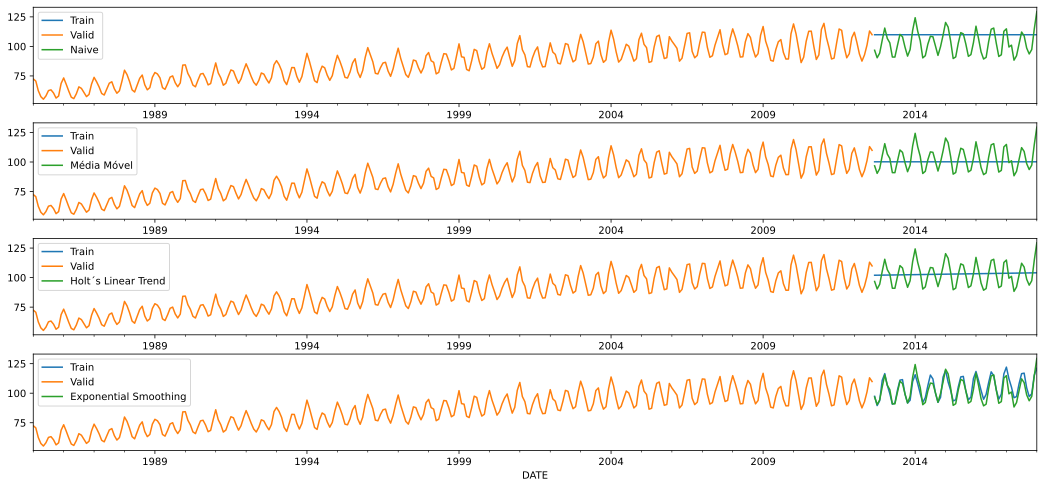

In [93]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(18,8))

y_hat.naive.plot(label='Naive', ax = ax1)
train.plot(ax=ax1)
valid.plot(ax=ax1)
ax1.legend(['Train', 'Valid', 'Naive'])

y_hat.m7.plot(label='Média Móvel', ax = ax2)
train.plot(ax=ax2)
valid.plot(ax=ax2)
ax2.legend(['Train', 'Valid', 'Média Móvel'])

y_hat.holt.plot( label='Holt', ax = ax3)
train.plot(ax=ax3)
valid.plot(ax=ax3)
ax3.legend(['Train', 'Valid', 'Holt´s Linear Trend'])


y_hat.ExpSmooth.plot(label='Exponential Smoothing', ax = ax4)
train.plot(ax=ax4)
valid.plot(ax=ax4)
ax4.legend(['Train', 'Valid', 'Exponential Smoothing'])

plt.show()